# But prise en main des objets créés par mes collègues et lancement d'un entrapînement à partir de la BDTOPO ou du RIL en tant que LAbel ??

In [18]:
import sys
sys.path.append('../src')
from satellite_image import SatelliteImage
from utils import *
from utils import get_root_path


In [34]:
import yaml
import re

In [2]:
import s3fs
fs = s3fs.S3FileSystem(client_kwargs={'endpoint_url': 'https://'+'minio.lab.sspcloud.fr'},key ='HUIYB810PA9ZAN2MU9SM', secret = '9FIaaomfT4plPjC14n2InjGEYo3C7OVWwuAxZ5+P', token = 'eyJhbGciOiJIUzUxMiIsInR5cCI6IkpXVCJ9.eyJhY2Nlc3NLZXkiOiJIVUlZQjgxMFBBOVpBTjJNVTlTTSIsImFsbG93ZWQtb3JpZ2lucyI6WyIqIl0sImF1ZCI6WyJtaW5pby1kYXRhbm9kZSIsIm9ueXhpYSIsImFjY291bnQiXSwiYXV0aF90aW1lIjoxNjc4MTAxMjU5LCJhenAiOiJvbnl4aWEiLCJlbWFpbCI6ImNsZW1lbnQuZ3VpbGxvQGluc2VlLmZyIiwiZW1haWxfdmVyaWZpZWQiOnRydWUsImV4cCI6MTY3ODI4ODY4MiwiZmFtaWx5X25hbWUiOiJHdWlsbG8iLCJnaXZlbl9uYW1lIjoiQ2zDqW1lbnQiLCJncm91cHMiOlsiY2hhbGxlbmdlZGF0YS1lbnMiLCJmdW5hdGhvbiIsInNsdW1zLWRldGVjdGlvbiJdLCJpYXQiOjE2NzgxMDEyNjAsImlzcyI6Imh0dHBzOi8vYXV0aC5sYWIuc3NwY2xvdWQuZnIvYXV0aC9yZWFsbXMvc3NwY2xvdWQiLCJqdGkiOiIwZmVkMDQ2My0zMWQ3LTRlMDMtYjJjZS04MDhkNWEyOTI4ZjkiLCJsb2NhbGUiOiJlbiIsIm5hbWUiOiJDbMOpbWVudCBHdWlsbG8iLCJub25jZSI6ImY3M2VhNGU1LTk4MzEtNGM2Yy04ZDhjLTU5MDMwYWE1ZTU3NiIsInBvbGljeSI6InN0c29ubHkiLCJwcmVmZXJyZWRfdXNlcm5hbWUiOiJjZ3VpbGxvIiwicmVhbG1fYWNjZXNzIjp7InJvbGVzIjpbIm9mZmxpbmVfYWNjZXNzIiwidW1hX2F1dGhvcml6YXRpb24iXX0sInJlc291cmNlX2FjY2VzcyI6eyJhY2NvdW50Ijp7InJvbGVzIjpbIm1hbmFnZS1hY2NvdW50IiwibWFuYWdlLWFjY291bnQtbGlua3MiLCJ2aWV3LXByb2ZpbGUiXX19LCJzY29wZSI6Im9wZW5pZCBwcm9maWxlIGdyb3VwcyBlbWFpbCIsInNlc3Npb25Qb2xpY3kiOiJleUpXWlhKemFXOXVJam9pTWpBeE1pMHhNQzB4TnlJc0lsTjBZWFJsYldWdWRDSTZXM3NpUldabVpXTjBJam9pUVd4c2IzY2lMQ0pCWTNScGIyNGlPbHNpY3pNNktpSmRMQ0pTWlhOdmRYSmpaU0k2V3lKaGNtNDZZWGR6T25Nek9qbzZjSEp2YW1WMExYTnNkVzF6TFdSbGRHVmpkR2x2YmlJc0ltRnlianBoZDNNNmN6TTZPanB3Y205cVpYUXRjMngxYlhNdFpHVjBaV04wYVc5dUx5b2lYWDBzZXlKRlptWmxZM1FpT2lKQmJHeHZkeUlzSWtGamRHbHZiaUk2V3lKek16cE1hWE4wUW5WamEyVjBJbDBzSWxKbGMyOTFjbU5sSWpwYkltRnlianBoZDNNNmN6TTZPam9xSWwwc0lrTnZibVJwZEdsdmJpSTZleUpUZEhKcGJtZE1hV3RsSWpwN0luTXpPbkJ5WldacGVDSTZJbVJwWm1aMWMybHZiaThxSW4xOWZTeDdJa1ZtWm1WamRDSTZJa0ZzYkc5M0lpd2lRV04wYVc5dUlqcGJJbk16T2tkbGRFOWlhbVZqZENKZExDSlNaWE52ZFhKalpTSTZXeUpoY200NllYZHpPbk16T2pvNktpOWthV1ptZFhOcGIyNHZLaUpkZlYxOSIsInNlc3Npb25fc3RhdGUiOiJjZGNhODY0Yy1hYzIyLTQzZTAtODNiYi04YjIyNTE0YTNmODQiLCJzaWQiOiJjZGNhODY0Yy1hYzIyLTQzZTAtODNiYi04YjIyNTE0YTNmODQiLCJzdWIiOiIzYjA2ZWZhNC01OWZlLTQzYzgtYTAyYi1hOTRkOWI0YjU0NGUiLCJ0eXAiOiJCZWFyZXIifQ.9iMAuRs0THRA75OvzFxc7U8BKRTkG1d2P1ZmkafMfJUpB1vDNcPNGUqvJH1CWBEeaXDkduDPfd3wi4JORHhagw')

In [20]:
fs.ls('projet-slums-detection/Donnees/RIL/')

['projet-slums-detection/Donnees/RIL/.keep',
 'projet-slums-detection/Donnees/RIL/DOM_GC_PC.csv',
 'projet-slums-detection/Donnees/RIL/new_gr',
 'projet-slums-detection/Donnees/RIL/old_gr',
 'projet-slums-detection/Donnees/RIL/rca_geometry_ilot.rds',
 'projet-slums-detection/Donnees/RIL/rca_geometry_ilots.rds',
 'projet-slums-detection/Donnees/RIL/ril_data.parquet',
 'projet-slums-detection/Donnees/RIL/ril_gc_dom.csv',
 'projet-slums-detection/Donnees/RIL/ril_pc_dom.csv']

In [28]:
environment["local-path"]["PLEIADES"]

'data/PLEIADES/Cayenne'

In [29]:
with open("../environment.yml") as f:
    environment = yaml.safe_load(f)

root_path = get_root_path()
bucket = environment["bucket"]
path_s3_cayenne_data = environment["sources"]["PLEIADES"]
path_local_cayenne_data = os.path.join(root_path, environment["local-path"]["PLEIADES"])


/home/onyxia/work/detection-bidonvilles/notebooks/../data/PLEIADES/Cayenne


In [35]:
filename = 'Cayenne_200722/16bits/ORT_2022072050325085_U22N/ORT_2022072050325085_0353_0545_U22N_16Bits.jp2'
date = datetime.strptime(re.search(r'ORT_(\d{8})', filename).group(1), '%Y%m%d')
date

datetime.datetime(2022, 7, 20, 0, 0)

In [80]:
image = SatelliteImage.from_raster(
        filename,
        date = date, 
        n_bands = 4,
        dep = "973"
    )

In [58]:
list_images = image.split(250)
list_images[0].array
len(list_images)

64

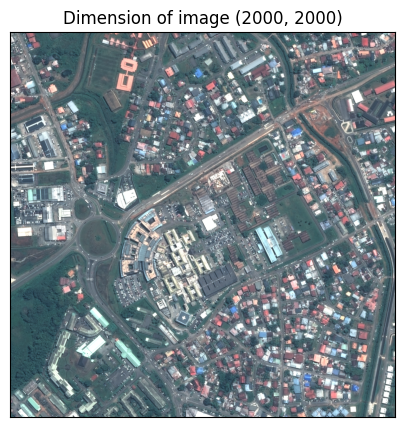

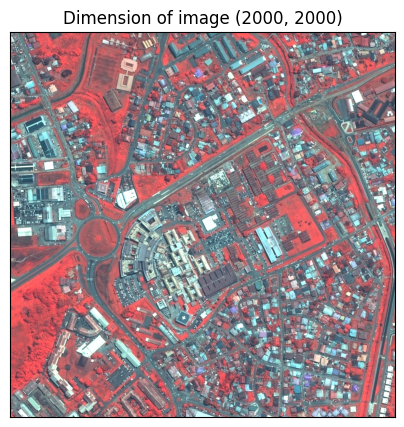

In [61]:
image.plot([0,1,2])
image.plot([3,1,2])

## Représenter la liste des images sous forme de grille (ajouter une fonction)

In [71]:
[im.bounds for im in list_images[1:10]] # Il suffit d'ordonner ça !

[BoundingBox(left=353125.0, bottom=544875.0, right=353250.0, top=545000.0),
 BoundingBox(left=353250.0, bottom=544875.0, right=353375.0, top=545000.0),
 BoundingBox(left=353375.0, bottom=544875.0, right=353500.0, top=545000.0),
 BoundingBox(left=353500.0, bottom=544875.0, right=353625.0, top=545000.0),
 BoundingBox(left=353625.0, bottom=544875.0, right=353750.0, top=545000.0),
 BoundingBox(left=353750.0, bottom=544875.0, right=353875.0, top=545000.0),
 BoundingBox(left=353875.0, bottom=544875.0, right=354000.0, top=545000.0),
 BoundingBox(left=353000.0, bottom=544750.0, right=353125.0, top=544875.0),
 BoundingBox(left=353125.0, bottom=544750.0, right=353250.0, top=544875.0)]

In [76]:
image.bounds[0]
image.bounds[1]
image.bounds[2]
# Plus qu'à utiliser la fonction que j'ai créée pour l'affichage d'une grille ?
# mettre certains notebooks dans du #old !

354000.0

In [78]:
64*256 # nb de patchs utilisables pour entrainer un modèle, why not ?

16384

In [86]:
#image.plot([0,1,2])
image.normalized # ok le plot normalise l'image donc attention  ? j'aurais tendanc e à l'enlever moi

True

## Récupération des labellisations

In [88]:
from labeler import RILLabeler
from labeled_satellite_image import SegmentationLabeledSatelliteImage

labeler = RILLabeler(date, dep = "973")

PermissionError: Forbidden